In [1]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
mat = loadmat('gridturbulence.mat')
u = mat['u']
fs = mat['fs'][0,0] #convert to value
n, nblock = u.shape
dt = 1 / fs

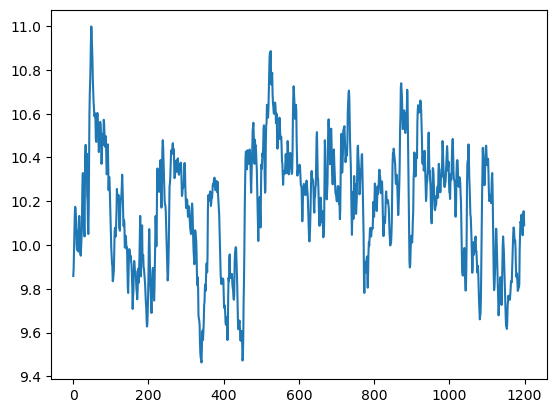

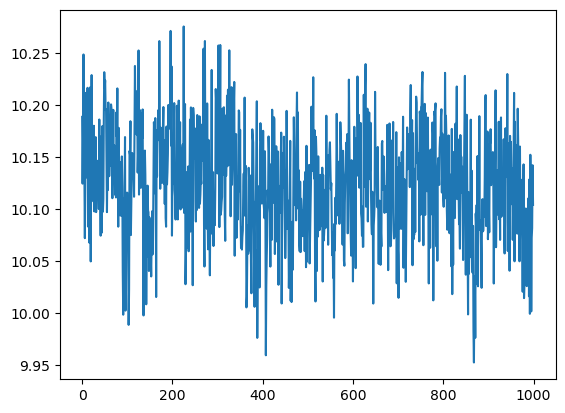

In [2]:
import matplotlib.pyplot as plt
plt.plot(u[:,0])
plt.show()

all_means = np.mean(u[:,:],axis=0)
plt.plot(all_means)
plt.show()


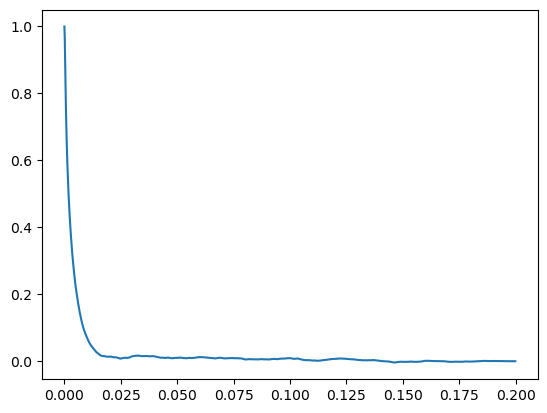

In [14]:
""" uf = u - u.mean() # fluctuation part
autocorr = np.correlate(uf[:,0], uf[:,0], mode='full') / n
autocorr_norm = autocorr / autocorr.max()
plt.plot(np.arange(n)*dt, autocorr_norm[n-1:])
plt.show() """

uf = u - u.mean() # fluctuation part
all_autocorr = np.zeros((n, nblock))

for i in range(nblock):
    temp = np.correlate(uf[:,i], uf[:,i], mode='full') / n
    all_autocorr[:,i] = temp[n-1:] / temp.max()   

plt.plot( np.arange(n)*dt,np.mean(all_autocorr,axis=1))
plt.show()

In [15]:
integral = np.trapz(np.mean(all_autocorr, axis=1), np.arange(n)*dt)
print("Integral under the plot:", integral)

print(n*dt/integral)

print(int(integral/dt))



Integral under the plot: 0.004282059652125338
46.706495529723156
25


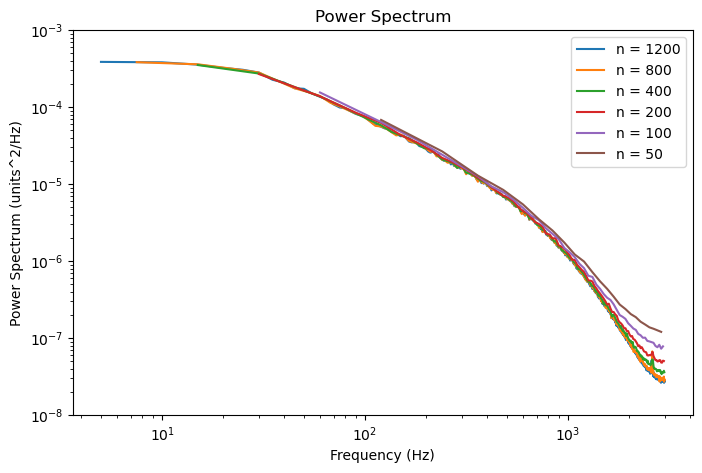

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

for i, n_val in enumerate([1200, 800, 400, 200, 100, 50]):
    S_all = np.zeros((n_val//2, nblock))
    f = np.arange(n_val) / (n_val * dt)

    for j in range(nblock):
        uft = dt * np.fft.fft(u[:n_val, j])
        S = uft * uft.conjugate() / (n_val * dt)
        S_all[:, j] = S[0:n_val//2].real

    row = i // 2
    col = i % 2
    ax.loglog(f[1:n_val//2], np.mean(S_all[1:, :],axis=1), label=f'n = {n_val}', color=f'C{i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum (units^2/Hz)')
plt.title('Power Spectrum')
plt.legend()
plt.ylim([1e-8, 1e-3])
plt.show()


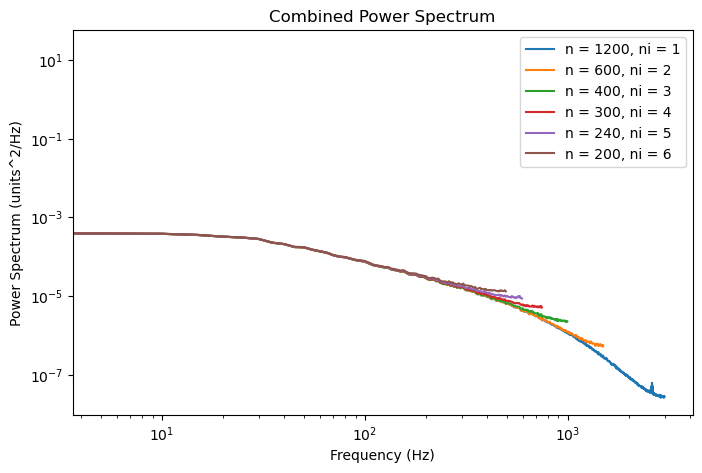

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))

for i, ni in enumerate([1, 2, 3, 4, 5, 6]):
    n_val = int(n / ni)
    S_all = np.zeros((n_val // 2, nblock))
    f = np.arange(n_val) / (n_val * dt * ni)

    for j in range(nblock):
        uft = dt*ni * np.fft.fft(u[::ni, j])
        S = uft * uft.conjugate() / (n_val * dt*ni)
        S_all[:, j] = S[0:n_val // 2].real

    ax.loglog(f[0:n_val // 2], np.mean(S_all[:, :], axis=1), label=f'n = {n_val}, ni = {ni}')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectrum (units^2/Hz)')
ax.set_title('Combined Power Spectrum')
ax.legend()
plt.show()


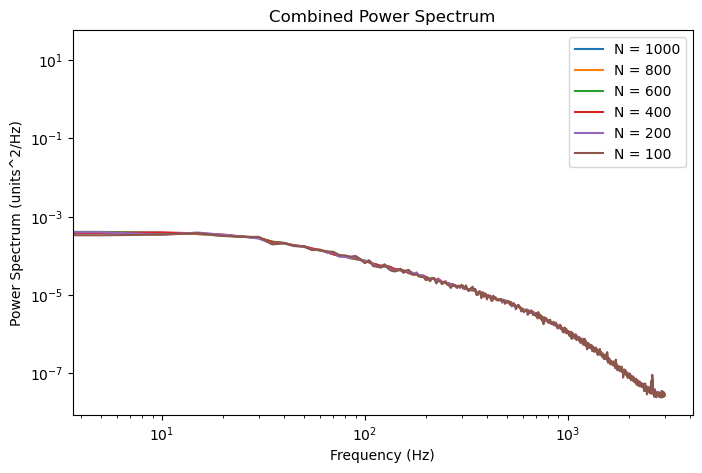

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

for i, nblock in enumerate([1000, 800, 600, 400, 200, 100]):
    n_val = n
    S_all = np.zeros((n_val//2, nblock))
    f = np.arange(n_val) / (n_val * dt)

    for j in range(nblock):
        uft = dt * np.fft.fft(u[:n_val, j])
        S = uft * uft.conjugate() / (n_val * dt)
        S_all[:, j] = S[0:n_val//2].real

    ax.loglog(f[0:n_val//2], np.mean(S_all[:, :],axis=1), label=f'N = {nblock}')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectrum (units^2/Hz)')
ax.set_title('Combined Power Spectrum')
ax.legend()
plt.show()